### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Problem Statement

### 2. Data Gathering

In [2]:
df = pd.read_csv('autos_dataset.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

### Encoding

#### Label Encoding

In [9]:
df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 
                        'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace = True)

In [10]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [11]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [12]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [13]:
df.replace("?", np.nan, inplace=True)

In [14]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [16]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
df.drop(['make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    int64  
 8   engine-size        205 non-null    int64  
 9   fuel-system        205 non-null    object 
 10  bore               201 non-null    object 
 11  stroke             201 non-null    object 
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [22]:
df.drop(['normalized-losses'], axis=1, inplace=True)

In [23]:
df.drop(['fuel-system'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    object 
 9   stroke             201 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    object 
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    object 
dtypes: float64(5), int64(6), o

In [25]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [26]:
a = '3.47'
type(a)

str

In [29]:
b = float(a)
type(b)

float

In [30]:
df['bore'] = df['bore'].astype('float')

In [31]:
df['stroke'] = df['stroke'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    object 
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    object 
dtypes: float64(7), int64(6), o

In [33]:
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')
df['price'] = df['price'].astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(10), int64(6)
m

In [35]:
df['bore'] = df['bore'].fillna(df['bore'].mean())

In [37]:
df['stroke'] = df['stroke'].fillna(df['bore'].mean())
df['horsepower'] = df['horsepower'].fillna(df['bore'].mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['bore'].mean())
df['price'] = df['price'].fillna(df['bore'].mean())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
dtypes: float64(10), int64(6)
m

In [40]:
df.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [41]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.000606,-0.178515,0.065997,0.178354,-0.035823,0.034606,-0.071464
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.158191,0.249786,0.352029,-0.215858,-0.470414,-0.544082,0.578809
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.127551,0.158414,0.527634,-0.227054,-0.670909,-0.704662,0.685023
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182390,0.181129,0.615512,-0.172666,-0.642704,-0.677218,0.695667
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.063162,0.261214,-0.098114,-0.194324,-0.048640,-0.107358,0.158431
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.167404,0.151362,0.729948,-0.177896,-0.757414,-0.797465,0.799783
num-of-cylinders,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,-0.002083,-0.020002,0.678860,-0.059962,-0.445837,-0.466666,0.644098
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.196916,0.028971,0.783234,-0.176855,-0.653658,-0.677470,0.838108
bore,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.231439,0.583798,1.000000,-0.055879,0.005201,0.546655,-0.209767,-0.584508,-0.586992,0.524043
stroke,-0.000606,0.158191,0.127551,0.182390,-0.063162,0.167404,-0.002083,0.196916,-0.055879,1.000000,0.185136,0.036378,-0.188262,-0.048170,-0.049165,0.087405


<Axes: >

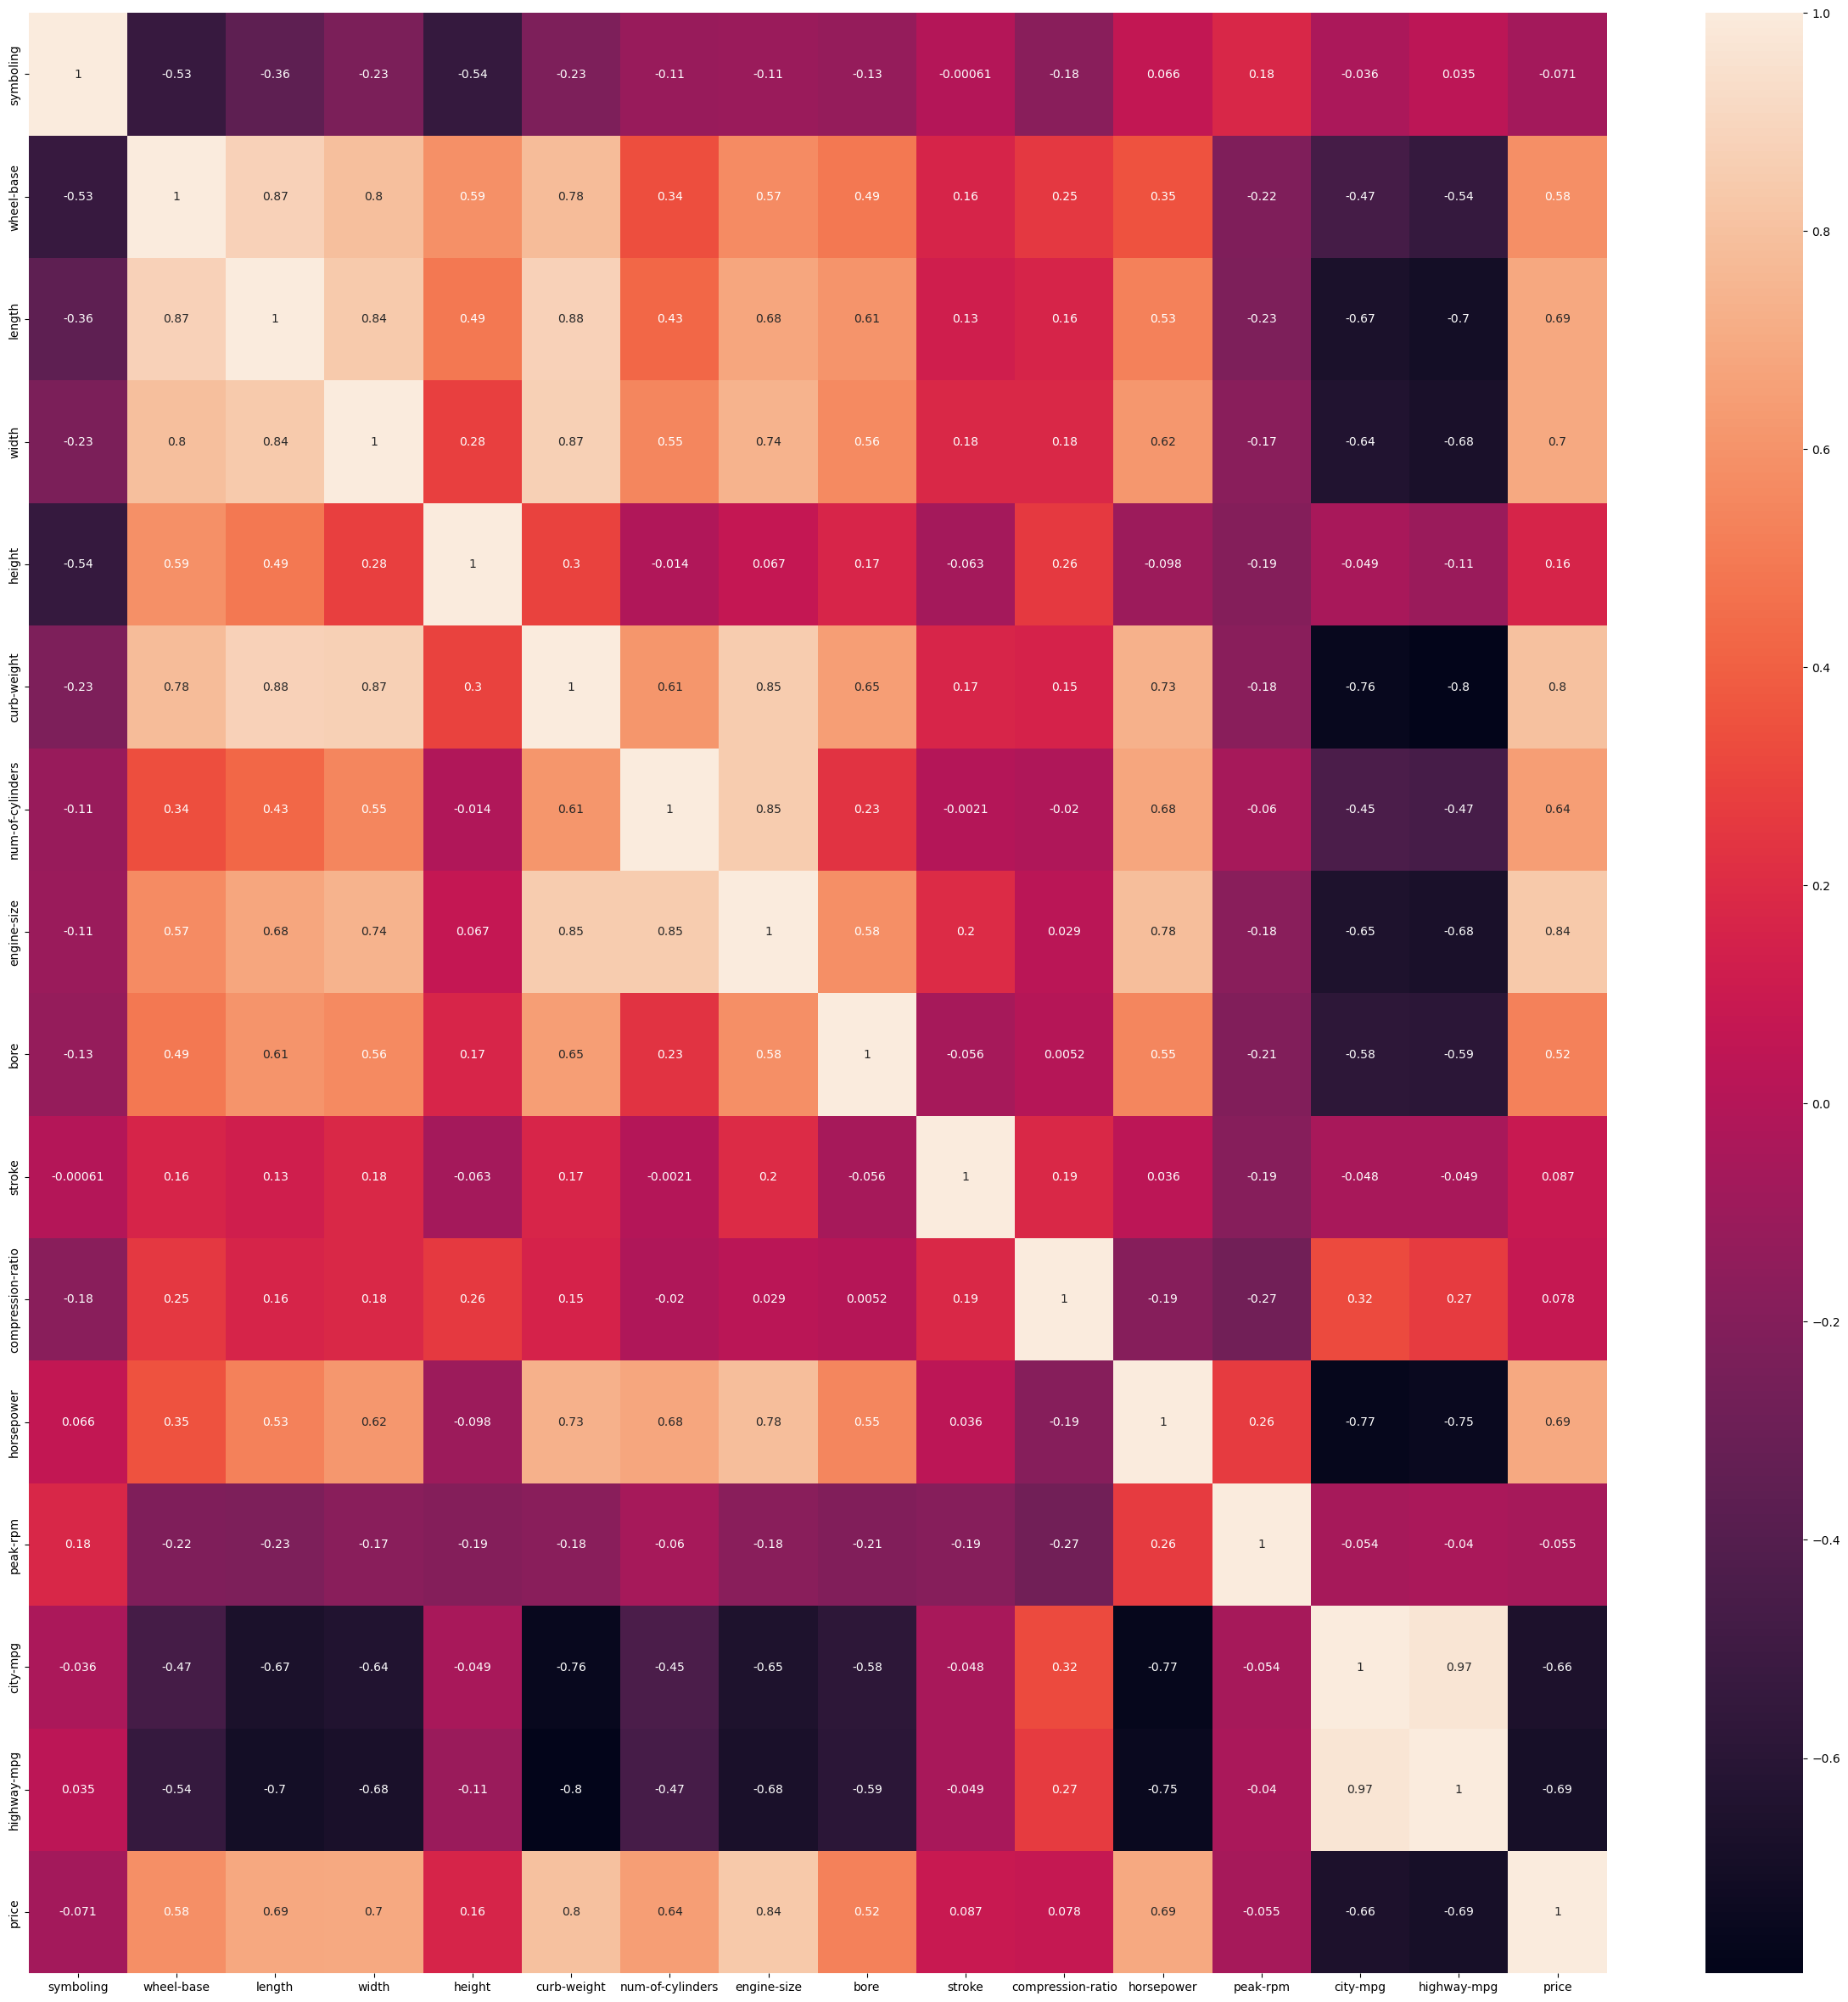

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

#### Train and Test Data

In [44]:
X = df.drop(['price'], axis=1, inplace=False)
y = df['price']

In [46]:
X.head().T

,0,1,2,3,4
symboling,3.00,3.00,1.00,2.00,2.00
wheel-base,88.60,88.60,94.50,99.80,99.40
length,168.80,168.80,171.20,176.60,176.60
width,64.10,64.10,65.50,66.20,66.40
height,48.80,48.80,52.40,54.30,54.30
curb-weight,2548.00,2548.00,2823.00,2337.00,2824.00
num-of-cylinders,4.00,4.00,6.00,4.00,5.00
engine-size,130.00,130.00,152.00,109.00,136.00
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.40,3.40


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=42)

In [48]:
X_train.shape

(143, 15)

In [49]:
X_test.shape   #dataframe

(62, 15)

In [51]:
y_train.shape    #series

(143,)

In [52]:
y_test.shape

(62,)

#### Model Training

In [53]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### Evaluation

In [54]:
y_pred = linear_model.predict(X_test)
y_pred    #predicted by model

array([26510.70444448, 14891.53057178, 10477.87327482, 14627.72487037,
       25295.35885741,  6044.75850761,  6585.10494461,  7966.1781674 ,
       10721.78943867,  7245.47898266, 17471.36194019,  7491.44863525,
       15831.18013764,  9991.65169548, 44367.2786187 ,  5731.53590782,
       -5709.90493184, 16840.16904386, 11448.84084313, 10297.11391287,
       12169.57917876, 22416.35333687,  5956.64404706, -3539.39770026,
        5541.15165062, 26535.71927259, 14828.25157308, 16593.63981366,
        6190.27219938, 16666.47780047, 25481.417049  ,  5587.23332788,
        8816.59891184, 22968.76225521,  8299.50755049, 25403.96576101,
        9884.59244989, 11570.8441944 ,  2475.80024002, 16581.84995473,
        9808.51808092, 12623.41463179, 19981.4888654 ,  6411.0910418 ,
        6322.25388376, 10216.86229083,  5587.23332788,  9572.97512544,
       17345.94435666, 16577.0329099 ,  2550.89455078, 19384.16138707,
        4315.66405575,  9236.79076434,  6217.5022814 , 16915.10679086,
      

In [55]:
y_test    #already available (actual)

15     30760.000000
9          3.329751
100     9549.000000
132    11850.000000
68     28248.000000
           ...     
56     11845.000000
128    37028.000000
76      5389.000000
144     9233.000000
104    17199.000000
Name: price, Length: 62, dtype: float64

In [56]:
mse = mean_squared_error(y_test, y_pred)
mse

21193279.506248813

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mae

3112.2923914658772

In [58]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7131137545479616